In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.utils import resample

In [2]:
hr_data = pd.read_excel('HR_Processed_data.xlsx');
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
hr_data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [6]:
hr_data.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [7]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

# DATA VISUALISATION

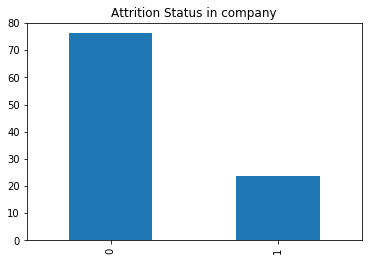

In [8]:
attrition = hr_data.left.value_counts()/hr_data.left.count()*100
attrition.plot(kind='bar',title='Attrition Status in company')

We see that the above bar graph tells the skewness of the data present with respect to attrition. This shows class imbalance in the data present as well as the present rate of attrition. In the following graph we visualize the attrition with respect to the salary group.

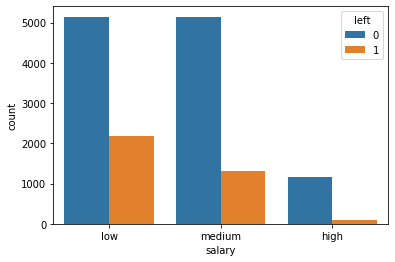

In [9]:
sns.countplot(x = 'salary',hue='left',data = hr_data)

We observe that the attrition is more in case of low salary. It is expected, as the employees may get better opportunities outside the company.

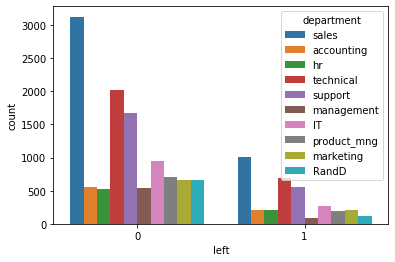

In [10]:
sns.countplot(x = 'left',hue='department',data = hr_data)

Here we see which department leads in attrition rate. The trend can be explained by the graph below. The number of low salary employees are more in sales, technical and support and hence explains the order in graph above.

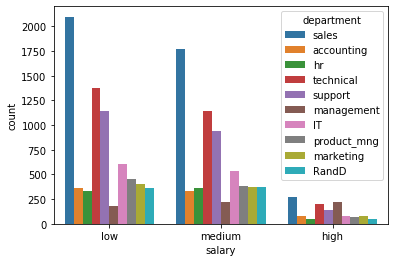

In [11]:
sns.countplot(x = 'salary',hue='department',data = hr_data)

Next we see how many people leave the company in case of accidents.

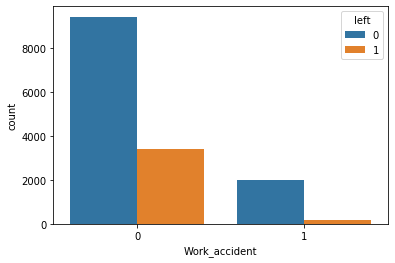

In [12]:
sns.countplot(x = 'Work_accident',hue='left',data = hr_data)

The satisfaction level of the employee is important for any company as it tells us about the employees feel about the work in the company.

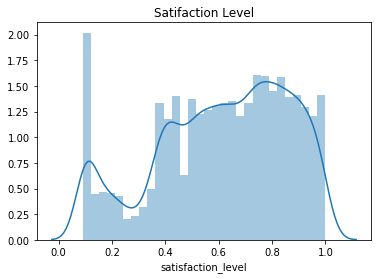

In [13]:
plt.title('Satifaction Level')
sns.distplot(hr_data.satisfaction_level)

Average monthly hours tells us about the work life balance the employee has.

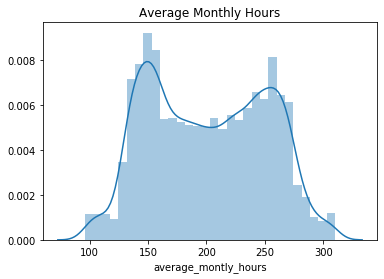

In [14]:
plt.title('Average Monthly Hours')
sns.distplot(hr_data.average_montly_hours)

(array([3244., 6443., 2557., 1473.,    0.,  718.,  188.,  162.,    0.,
         214.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

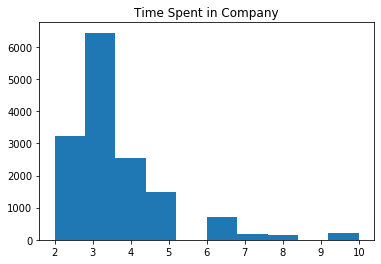

In [174]:
plt.title('Time Spent in Company')
plt.hist(hr_data.time_spend_company)

(array([ 351.,  885., 2371., 1590., 1372., 1518., 1423., 1970., 1669.,
        1850.]),
 array([0.36 , 0.424, 0.488, 0.552, 0.616, 0.68 , 0.744, 0.808, 0.872,
        0.936, 1.   ]),
 <a list of 10 Patch objects>)

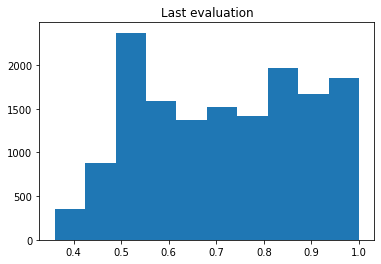

In [16]:
plt.title('Last evaluation')
plt.hist(hr_data.last_evaluation)

(0, 10)

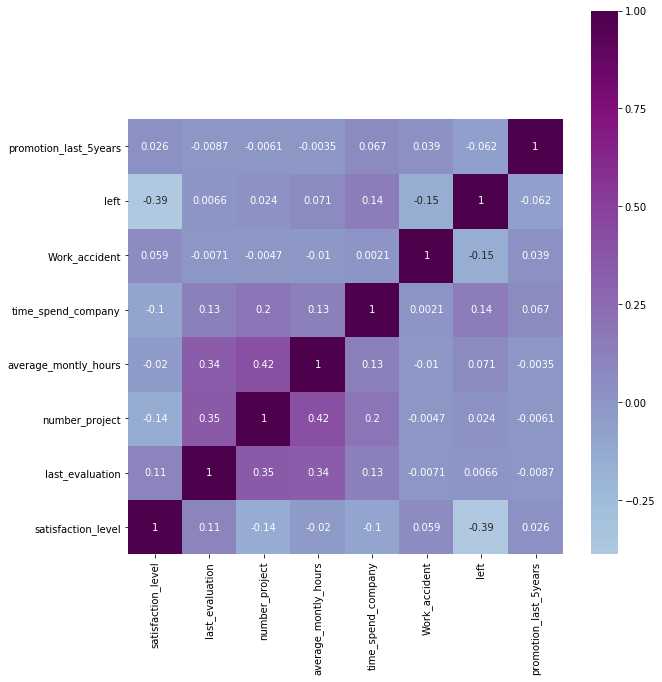

In [17]:
cor = hr_data.corr()

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(cor, square = True, center = 0, annot = True, cmap="BuPu")
ax.set_ylim(0,10)

# DATA MANIPULATION

Segregating employees that add more value to the company (valuable employees) using few constraints.

In [18]:
imp_emp = hr_data[(hr_data['last_evaluation'] >= 0.6) & (hr_data['time_spend_company'] >= 4) & (hr_data['number_project'] >= 5)]

In [46]:
imp_ind = hr_data[(hr_data['last_evaluation'] >= 0.6) & (hr_data['time_spend_company'] >= 4) & (hr_data['number_project'] >= 5)].index

In [19]:
len(imp_emp)

2225

(0, 10)

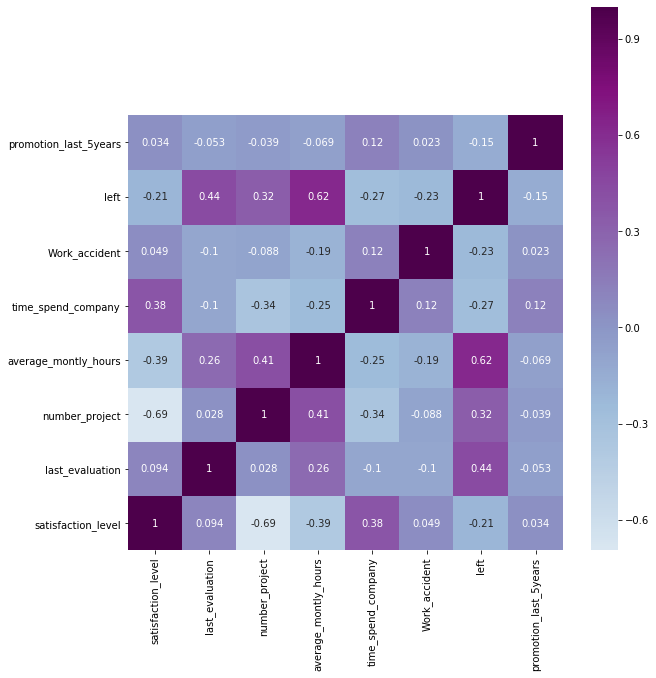

In [20]:
imp_cor = imp_emp.corr()

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(imp_cor, square = True, center = 0, annot = True, cmap="BuPu")
ax.set_ylim(0,10)

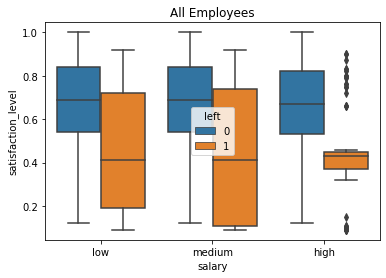

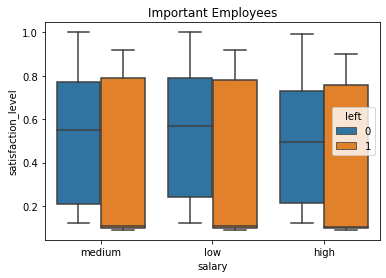

In [21]:
plt.title('All Employees')
sns.boxplot(x='salary', y='satisfaction_level', data=hr_data, hue='left')
plt.show()

plt.title('Important Employees')
sns.boxplot(x='salary',y='satisfaction_level', data=imp_emp, hue='left')
plt.show()



Satisfaction levels of employees is consistently lower in case of employees that have left the company.

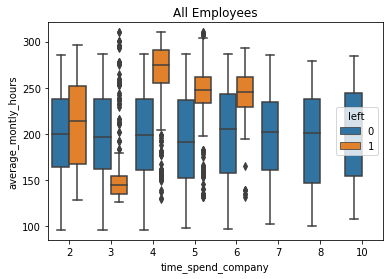

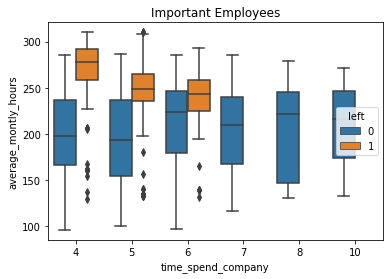

In [22]:
plt.title('All Employees')
sns.boxplot(y='average_montly_hours', x='time_spend_company', data=hr_data, hue='left')
plt.show()

plt.title('Important Employees')
sns.boxplot(y='average_montly_hours',x='time_spend_company', data=imp_emp, hue='left')
plt.show()

Average monthly hourse spent by the people who left the company is higher than the ones who are still employed in the company.

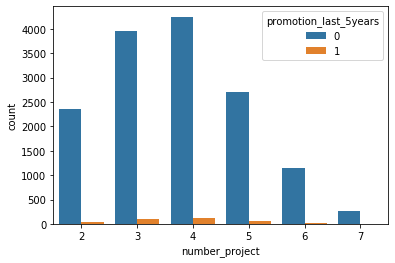

In [177]:
sns.countplot(x = 'number_project',hue='promotion_last_5years',data = hr_data)

Examining the promotion count with respect to the number of projects.

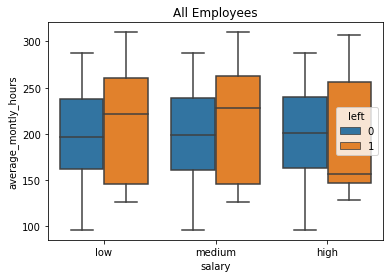

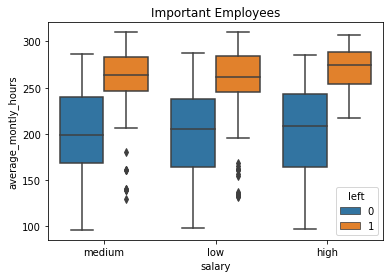

In [24]:
plt.title('All Employees')
sns.boxplot(x='salary', y='average_montly_hours', data=hr_data, hue='left')
plt.show()

plt.title('Important Employees')
sns.boxplot(x='salary',y='average_montly_hours', data=imp_emp, hue='left')
plt.show()

This tells us that higher working hours with low salary are more prone to leave.

In [164]:
# ind1 = hr_data[(hr_data.average_montly_hours>=200) & (hr_data.time_spend_company==3) & (hr_data.left==1)].index

# ind2 = hr_data[(hr_data.average_montly_hours<=170) & (hr_data.time_spend_company==4) & (hr_data.left==1)].index

# ind3 = hr_data[(hr_data.average_montly_hours<=150) & (hr_data.time_spend_company==5) & (hr_data.left==1)].index

# hr_cop = hr_data

# hr_cop = hr_cop.drop(ind1)
# hr_cop = hr_cop.drop(ind2)
# hr_cop = hr_cop.drop(ind3)

In [165]:
# class_1 = hr_data[hr_data.left==1]
# class_0 = hr_data[hr_data.left==0]

In [166]:
# len(class_1),len(class_0)

In [167]:
# max_acc = 0
# model = LogisticRegression()
# for it in range(1,101):
#     class_0_new = resample(class_0, replace=False, n_samples=3571, random_state=it) 
#     len(class_0_new)

#     hr_new = pd.concat([class_0_new, class_1])

#     target = hr_new['left']
#     enc = OneHotEncoder()
#     cat_data = enc.fit_transform(hr_new.loc[:,['department','salary']]).toarray()

#     # hr_new.isnull().sum()

#     # target.value_counts()

#     num = hr_new.iloc[:,:-5]
#     # num.head()

#     sc = StandardScaler()
#     num_data = sc.fit_transform(num)

#     # num_data

#     variables = np.hstack([num_data,hr_new.loc[:,['Work_accident','promotion_last_5years']].to_numpy(),cat_data])

#     # variables[0].shape

#     # variables[0]

#     linear_model_1 = LogisticRegression()

#     X_train, X_test, y_train, y_test = train_test_split(variables, target.to_numpy(), test_size = 0.25, random_state = 123)

#     linear_model_1.fit(X_train, y_train)

# #     print('Model Coef',linear_model_1.coef_)

# #     print('Model intercept',linear_model_1.intercept_)

#     y_pred = linear_model_1.predict(X_test)
    
#     acc = (y_pred == y_test).sum()/len(y_test);
#     print('ieteration',it)
#     print('accuracy',acc)
    
#     if acc > max_acc:
#         max_acc = acc
#         model = linear_model_1

#     confusion_matrix(y_test, y_pred)

In [168]:
# max_acc

# MODEL SELECTION
### Model 1

Creating a function to train model. We train 2 models, one for regular employee and the other for valuable employees. we then later combine them to give optimum results.

In [288]:
def train_model(hr_new, weight_class):
    target = hr_new['left']
    enc = OneHotEncoder()
    cat_data = enc.fit_transform(hr_new.loc[:,['department','salary']]).toarray()

    # hr_new.isnull().sum()

    # target.value_counts()

    num = hr_new.iloc[:,:-5]
    # num.head()
    print(num.columns)
    num_data = num
#     sc = StandardScaler()
#     num_data = sc.fit_transform(num)

    # num_data

    variables = np.hstack([num_data,hr_new.loc[:,['Work_accident','promotion_last_5years']].to_numpy(),cat_data])

    # variables[0].shape

    # variables[0]

    linear_model = LogisticRegression(penalty = 'l2' ,class_weight = weight_class)

    X_train, X_test, y_train, y_test = train_test_split(variables, target.to_numpy(), test_size = 0.3, random_state = 0)
#     print(X_train[0])
    
    linear_model.fit(X_train, y_train)
   

    #     print('Model Coef',linear_model_1.coef_)

    #     print('Model intercept',linear_model_1.intercept_)

    y_pred = linear_model.predict(X_test)

#     acc = (y_pred == y_test).sum()/len(y_test);
#     print('accuracy',acc)

#     if acc > max_acc:
#         max_acc = acc
#         model = linear_model_1

    print(confusion_matrix(y_test, y_pred))
    return linear_model,X_test,y_test

In [289]:
hr_new = hr_data.drop(imp_ind)
model1,test1_x,test1_y = train_model(hr_data.drop(imp_ind),'')
model2,test2_x,test2_y = train_model(imp_emp,'balanced')

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company'],
      dtype='object')
[[3108  105]
 [ 230  390]]
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company'],
      dtype='object')
[[177  41]
 [ 30 420]]


/home/fegadepoojan/Virtual_environment/CBPA/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fegadepoojan/Virtual_environment/CBPA/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [293]:
model2.coef_

array([[-0.08001637,  4.03662824,  0.03457364,  0.0307354 , -0.45682995,
        -0.95251866, -1.28536759, -0.49786641, -0.92733148, -0.733681  ,
        -0.26084151, -0.9188091 , -0.58752876, -0.57317549, -0.83515914,
        -0.27942236, -0.61774667, -3.10146272, -1.36162395, -1.76847527]])

In [274]:
def predict(model,x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
#         print(x[i])
        if (x[i][1] >= 0.6) & (x[i][4] >= 4) & (x[i][2] >= 5):
            y[i] = model[1].predict([x[i]])
        else:
            y[i] = model[0].predict([x[i]])
    return y

def conf_mat(y_pred,y_test):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for ind in range(0,len(y_test)):
        if y_pred[ind] == y_test[ind]:
            if y_pred[ind] == 0:
                TN+=1
            else:
                TP+=1
        else:
            if y_pred[ind] == 0:
                FN+=1
            else:
                FP+=1
    return [[TN,FP],[FN,TP]]

def roc_gen(model,x,y_test):
    y_prob = np.zeros(len(x))
    for i in range(0,len(x)):
        if (x[i][1] >= 0.6) & (x[i][4] >= 4) & (x[i][2] >= 5):
            y_prob[i] = model[1].predict_proba([x[i]])[0][1]
        else:
            y_prob[i] = model[0].predict_proba([x[i]])[0][1]
            
    return roc_curve(y_test,y_prob)

In [275]:
y_pred = predict([model1,model2],np.vstack([test1_x,test2_x]))

In [276]:
y_test = np.hstack([test1_y,test2_y])
(y_pred == y_test).sum()/len(y_pred)


0.9097978227060654

In [277]:
conf_mat(y_pred,y_test)

[[3285, 146], [260, 810]]

In [278]:
fpr,tpr,thresh = roc_gen([model1,model2],np.vstack([test1_x,test2_x]),y_test)

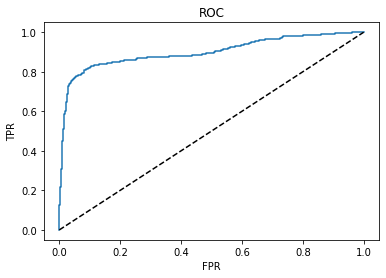

In [279]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

### OR
### Model 2

Building model without seperating the dataset in terms of valuable employee is shown below

/home/fegadepoojan/Virtual_environment/CBPA/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy 0.7584444444444445


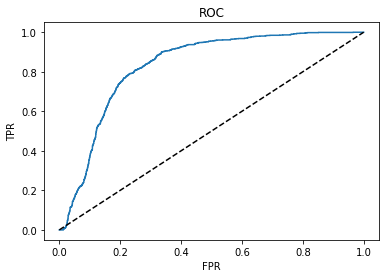

In [280]:
hr_new = hr_data
target = hr_new['left']
enc = OneHotEncoder()
cat_data = enc.fit_transform(hr_new.loc[:,['department','salary']]).toarray()

# hr_new.isnull().sum()

# target.value_counts()

num = hr_new.iloc[:,:-5]
# num.head()

sc = StandardScaler()
num_data = sc.fit_transform(num)

# num_data

variables = np.hstack([num_data,hr_new.loc[:,['Work_accident','promotion_last_5years']].to_numpy(),cat_data])

# variables[0].shape

# variables[0]

linear_model_2 = LogisticRegression(penalty ='l2' ,class_weight = 'balanced')

X_train, X_test, y_train, y_test = train_test_split(variables, target.to_numpy(), test_size = 0.3, random_state = 0)

linear_model_2.fit(X_train, y_train)

#     print('Model Coef',linear_model_1.coef_)

#     print('Model intercept',linear_model_1.intercept_)

y_pred = linear_model_2.predict(X_test)

acc = (y_pred == y_test).sum()/len(y_test);
print('accuracy',acc)

if acc > max_acc:
    max_acc = acc
    model = linear_model_1

confusion_matrix(y_test, y_pred)

y_prob = linear_model_2.predict_proba(X_test)[:,1]

# y_prob[0][1]

fpr,tpr,thresh = roc_curve(y_test,y_prob)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

We can use model 1 which can be further improved by using boosting algorithms.